In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
plt.style.use('ggplot')
%matplotlib inline

In [181]:
def binary_decision_bd(X, y, ax, classifier, steps=100):

    x1_min = X[:, 0].min() - 0.2*np.abs(X[:, 0].min())
    x1_max = X[:, 0].max() + 0.2*np.abs(X[:, 0].max())
    
    x2_min = X[:, 1].min() - 0.2*np.abs(X[:, 1].min())
    x2_max = X[:, 1].max() + 0.2*np.abs(X[:, 1].max())
    
    xv, yv = np.meshgrid(np.linspace(x1_min, x1_max, steps), np.linspace(x2_min, x2_max, steps))

    p = classifier.predict(np.array([xv.flatten(), yv.flatten()]).T)
    p = p.reshape(xv.shape)
    ax.contourf(xv, yv, p, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    return ax


    

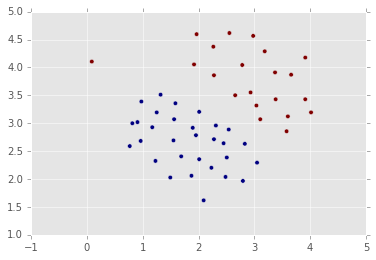

In [144]:
mat = scipy.io.loadmat('ex6data1.mat')
X = mat['X']
y = mat['y']

fig, ax = plt.subplots()
color = ['r', 'b']

ax.scatter(X[:, 0], X[:, 1], c=y)
    

### Linear Kernel SVM (varying C parameter)

In [145]:
# data normalization
from sklearn.preprocessing import StandardScaler
from sklearn import svm

X_norm = np.zeros(X.shape)
for col in range(X.shape[1]):
    col_mean = X[:, col].mean()
    col_sigma = X[:, col].std()
    X_norm[:, col] = (X[:, col] - col_mean)/col_sigma


In [165]:
C = np.logspace(-2, 7, 10)

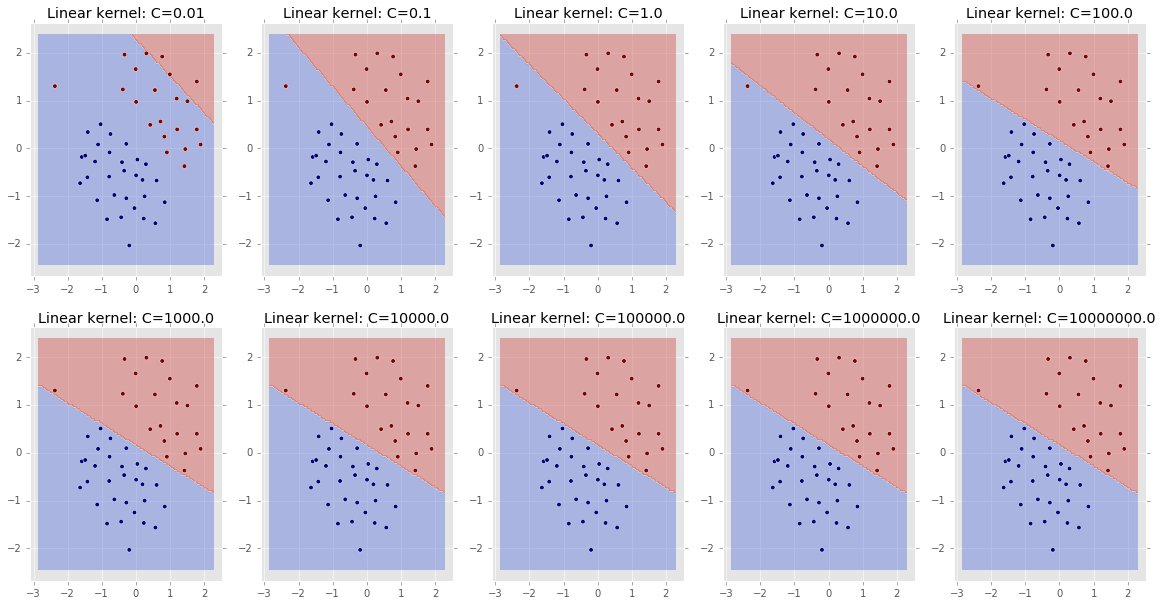

In [167]:
fig = plt.figure(figsize=(20, 10))

for index, c in enumerate(C):
    ax = fig.add_subplot(2, 5, index+1)
    clf = svm.SVC(C=c, kernel='linear')
    clf.fit(X_norm, y)
    
    title = "Linear kernel: C=%s" %c
    
    ax = binary_decision_bd(X_norm, y, ax, clf)
    ax.set_title(title)

### Gaussian Kernel (Dataset2)

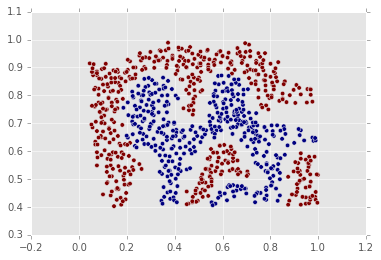

In [169]:
# loading data
mat = scipy.io.loadmat('ex6data2.mat')
X = mat['X']
y = mat['y']

fig, ax = plt.subplots()
color = ['r', 'b']

ax.scatter(X[:, 0], X[:, 1], c=y)

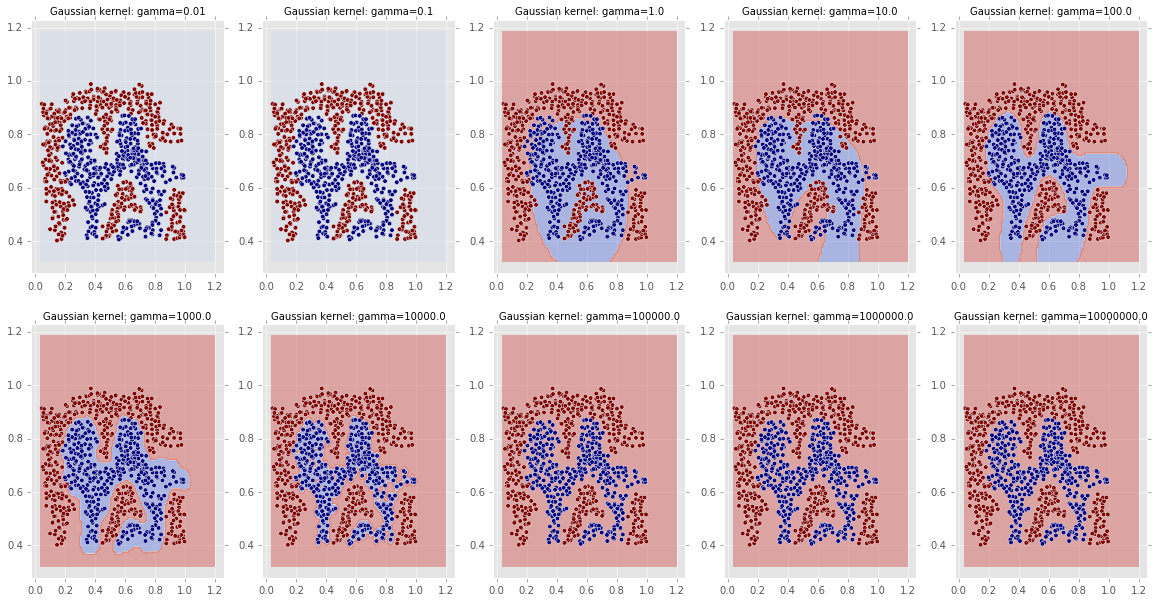

In [180]:
gamma = np.logspace(-2, 7, 10)
fig = plt.figure(figsize=(20, 10))
for index, g in enumerate(gamma):
    ax = fig.add_subplot(2, 5, index+1)
    clf = svm.SVC(C=1, kernel='rbf', gamma=g)
    clf.fit(X, y)
    
    title = "Gaussian kernel: gamma=%s" %g
    
    ax = binary_decision_bd(X, y, ax, clf)
    ax.set_title(title, fontsize=10)



### Best Gaussian Kernel (Dataset3)

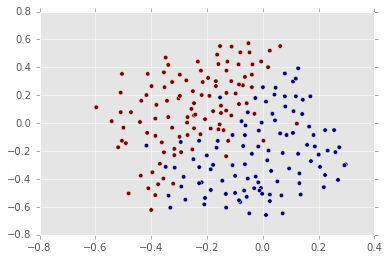

In [184]:
# loading data
mat = scipy.io.loadmat('ex6data3.mat')
X = mat['X']
y = mat['y']
Xval = mat['Xval']
yval = mat['yval']
fig, ax = plt.subplots()
color = ['r', 'b']

ax.scatter(X[:, 0], X[:, 1], c=y)

In [220]:
test_c = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
test_gamma = [0.5/(c**2) for c in test_c]

best_accuracy = 0  
for c in test_c:
    for g in test_gamma:
        clf = svm.SVC(C=c, kernel='rbf', gamma=g)
        clf.fit(X, y)
        p = clf.predict(Xval)
        p = p.reshape(yval.shape)
        accuracy = (p==yval).sum()
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_c = c
            best_g = g
print("Optimum C value to use is: %s") %best_c
print("Optimum gamma value to use is: %s") %best_g

        

Optimum C value to use is: 1
Optimum gamma value to use is: 50.0


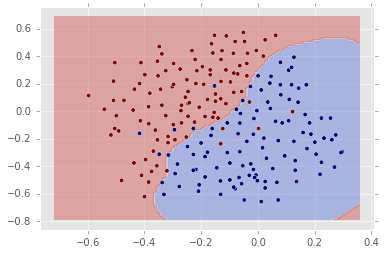

In [221]:
# visualize eval dataset
clf = svm.SVC(C=best_c, kernel='rbf', gamma=50)
clf.fit(X, y)
fig, ax = plt.subplots()
ax = binary_decision_bd(X, y, ax, clf)